In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
SEED = 42

In [5]:
latent_vectors = np.load('../latent_vectors/latent_vector_55112.npy')
df = pd.DataFrame(latent_vectors)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 55112 entries, 0 to 55111
dtypes: float32(55112)
memory usage: 21.0 MB
None


In [9]:
k = 10
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, max_iter=30, n_init=20, random_state=SEED))
kmeans.fit(df)
print(kmeans[1].labels_)

c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 5
 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 6 3 0 0 0 0 0 1 0]


c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\gaston\miniconda3\envs\td6\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

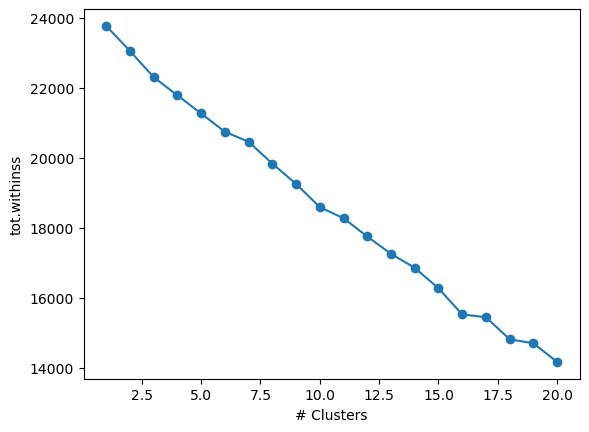

In [8]:
evol_variabilidad = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=30, n_init=20)
    kmeans.fit(df)
    evol_variabilidad.append({"k": k, "var": kmeans.inertia_})

evol_variabilidad = pd.DataFrame(evol_variabilidad)
plt.figure()
plt.plot(evol_variabilidad["k"], evol_variabilidad["var"], marker="o")
plt.xlabel("# Clusters")
plt.ylabel("tot.withinss")
plt.show()